In [18]:
import torch
from data.CRSPLoader import CRSPLoader

device = torch.device('cpu')
window_length = 50
step_length = 1

# load and prepare dataset
loader = CRSPLoader(load_data=True)
# Only ETFs
etf_tickers = ['SPY', 'XLF', 'XLB', 'XLK', 'XLV', 'XLI', 'XLU', 'XLY', 'XLP', 'XLE']
# Full 664 tickers
#etf_tickers = ['AA', 'ABM', 'ABT', 'ADI', 'ADM', 'ADX', 'AEE', 'AEG', 'AEM', 'AEP', 'AES', 'AFG', 'AFL', 'AIG', 'AIN', 'AIR', 'AIV', 'AJG', 'ALB', 'ALK', 'ALL', 'ALV', 'AMD', 'AME', 'AMG', 'AMT', 'AN', 'ANF', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ARW', 'ASA', 'ASG', 'ASGN', 'ASH', 'ATI', 'ATO', 'ATR', 'AU', 'AVA', 'AVB', 'AVT', 'AVY', 'AWF', 'AWR', 'AXL', 'AXP', 'AZN', 'AZO', 'B', 'BA', 'BAC', 'BAX', 'BBY', 'BC', 'BCE', 'BCS', 'BDN', 'BDX', 'BEN', 'BF', 'BFS', 'BHE', 'BHP', 'BIO', 'BK', 'BKE', 'BKH', 'BKN', 'BKT', 'BLK', 'BLL', 'BMO', 'BMY', 'BOH', 'BPT', 'BRC', 'BRK', 'BRO', 'BSX', 'BTI', 'BTO', 'BWA', 'BXP', 'BYD', 'CAG', 'CAH', 'CAT', 'CB', 'CBT', 'CCK', 'CCL', 'CDE', 'CFR', 'CHD', 'CHH', 'CHN', 'CI', 'CIA', 'CIEN', 'CIF', 'CIK', 'CL', 'CLB', 'CLF', 'CLS', 'CLX', 'CMA', 'CMC', 'CMS', 'CMU', 'CNA', 'CNI', 'CNX', 'COF', 'COHU', 'COO', 'CP', 'CPB', 'CPE', 'CPK', 'CPT', 'CR', 'CRD', 'CRK', 'CRS', 'CRY', 'CSL', 'CSX', 'CTS', 'CUZ', 'CVS', 'CW', 'CWT', 'CX', 'CXE', 'D', 'DBD', 'DCI', 'DDF', 'DDS', 'DE', 'DEO', 'DGX', 'DHF', 'DHI', 'DHR', 'DHY', 'DIS', 'DLX', 'DNP', 'DOV', 'DOX', 'DRE', 'DRI', 'DRQ', 'DSM', 'DSU', 'DTE', 'DUK', 'DVN', 'DY', 'E', 'EAT', 'EBF', 'ECL', 'ED', 'EFX', 'EGP', 'EIX', 'EL', 'ELY', 'EMF', 'EMN', 'EMR', 'ENZ', 'EOG', 'EPD', 'EPR', 'EQR', 'EQT', 'ESE', 'ESS', 'ETN', 'ETR', 'EVF', 'EWH', 'EWJ', 'EWQ', 'EWS', 'EWU', 'F', 'FAF', 'FBP', 'FC', 'FCF', 'FCN', 'FCX', 'FDP', 'FDS', 'FDX', 'FE', 'FIX', 'FLS', 'FMC', 'FMS', 'FNF', 'FOE', 'FR', 'FRT', 'FSS', 'FT', 'FUN', 'GAB', 'GAM', 'GBL', 'GCI', 'GCO', 'GD', 'GE', 'GES', 'GF', 'GFF', 'GGG', 'GGT', 'GIB', 'GIL', 'GIM', 'GIS', 'GLT', 'GLW', 'GPC', 'GPI', 'GPS', 'GS', 'GT', 'GUT', 'GVA', 'GWW', 'HAE', 'HAL', 'HAS', 'HCN', 'HD', 'HE', 'HEI', 'HIG', 'HIO', 'HIW', 'HIX', 'HL', 'HMC', 'HMN', 'HNI', 'HON', 'HP', 'HQH', 'HQL', 'HR', 'HRB', 'HRL', 'HSC', 'HSY', 'HUM', 'HVT', 'HXL', 'HYB', 'IBM', 'IDA', 'IEX', 'IFF', 'IFN', 'IGT', 'IIF', 'IMAX', 'INCY', 'INFY', 'ING', 'INT', 'IO', 'IP', 'IPG', 'IQI', 'IR', 'IRM', 'IT', 'ITW', 'IVC', 'JBL', 'JCI', 'JNJ', 'JNPR', 'JOE', 'JOF', 'JPM', 'JW', 'JWN', 'K', 'KBH', 'KEP', 'KEX', 'KEY', 'KFY', 'KGC', 'KIM', 'KMB', 'KMT', 'KMX', 'KO', 'KOF', 'KR', 'KRC', 'KSM', 'KSS', 'KTF', 'LEE', 'LEG', 'LEN', 'LEO', 'LGF', 'LH', 'LII', 'LLY', 'LMT', 'LNC', 'LNN', 'LNT', 'LOW', 'LPX', 'LTC', 'LUB', 'LUV', 'LXP', 'LZB', 'MAA', 'MAC', 'MAN', 'MAR', 'MAS', 'MAT', 'MBI', 'MCA', 'MCD', 'MCK', 'MCR', 'MCS', 'MCY', 'MDC', 'MDT', 'MDU', 'MFC', 'MFL', 'MFM', 'MGA', 'MGF', 'MHF', 'MHK', 'MHN', 'MIN', 'MIY', 'MKC', 'MKL', 'MLI', 'MLM', 'MMC', 'MMM', 'MMS', 'MMT', 'MMU', 'MO', 'MOG', 'MPA', 'MQT', 'MQY', 'MRK', 'MRO', 'MSD', 'MSM', 'MTB', 'MTD', 'MTG', 'MTN', 'MTW', 'MTX', 'MTZ', 'MU', 'MUA', 'MUC', 'MUJ', 'MUR', 'MVF', 'MVT', 'MXF', 'MYC', 'MYD', 'MYE', 'MYI', 'MYJ', 'MYN', 'NAC', 'NAD', 'NBR', 'NC', 'NCA', 'NCR', 'NEM', 'NFG', 'NHI', 'NI', 'NJR', 'NKE', 'NL', 'NLY', 'NNN', 'NOC', 'NOK', 'NPK', 'NR', 'NSC', 'NSL', 'NUE', 'NUS', 'NUV', 'NVO', 'NVR', 'NWL', 'NX', 'NXP', 'NYT', 'O', 'OCN', 'ODP', 'OFG', 'OGE', 'OHI', 'OI', 'OIA', 'OII', 'OKE', 'OLN', 'OMC', 'OMI', 'ORCL', 'ORI', 'OXY', 'PAA', 'PBI', 'PCF', 'PCG', 'PCH', 'PEG', 'PEI', 'PEO', 'PEP', 'PFD', 'PFE', 'PFO', 'PG', 'PGR', 'PH', 'PHG', 'PHI', 'PHM', 'PII', 'PIM', 'PKE', 'PKI', 'PKX', 'PLD', 'PMM', 'PMO', 'PNC', 'PNM', 'PNR', 'PNW', 'PPG', 'PPL', 'PPT', 'PRGO', 'PSA', 'PSB', 'PVH', 'PWR', 'PXD', 'R', 'RAD', 'RCL', 'RCS', 'RDN', 'RE', 'REG', 'REV', 'RGA', 'RGR', 'RHI', 'RIG', 'RJF', 'RL', 'RLI', 'RMD', 'RNR', 'ROG', 'ROK', 'ROL', 'ROP', 'RPM', 'RRC', 'RS', 'RSG', 'RVT', 'RY', 'RYN', 'SAH', 'SAM', 'SBR', 'SCS', 'SEE', 'SFE', 'SGU', 'SHW', 'SJI', 'SJM', 'SJR', 'SJT', 'SKM', 'SKT', 'SKX', 'SLB', 'SLG', 'SLM', 'SMG', 'SNA', 'SNV', 'SO', 'SON', 'SOR', 'SPG', 'SPH', 'SPY', 'SRE', 'SRI', 'SSD', 'SSP', 'STE', 'STM', 'STT', 'SU', 'SUI', 'SUP', 'SWK', 'SWM', 'SWN', 'SWX', 'SWZ', 'SXI', 'SYK', 'SYY', 'TD', 'TDF', 'TDS', 'TDW', 'TDY', 'TEF', 'TEI', 'TEN', 'TEO', 'TER', 'TEVA', 'TEX', 'TFX', 'TG', 'TGI', 'THC', 'THO', 'TJX', 'TK', 'TKR', 'TLK', 'TM', 'TMO', 'TOL', 'TR', 'TRN', 'TRP', 'TSM', 'TSN', 'TTC', 'TTI', 'TUP', 'TV', 'TWI', 'TXN', 'TXT', 'TY', 'TYL', 'UDR', 'UFI', 'UGI', 'UHS', 'UHT', 'UIS', 'UL', 'UNFI', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USA', 'USB', 'USM', 'UVV', 'VBF', 'VFC', 'VGM', 'VKQ', 'VLO', 'VLY', 'VMC', 'VMO', 'VNO', 'VOD', 'VSH', 'VTR', 'VVI', 'VVR', 'WAB', 'WABC', 'WAT', 'WCC', 'WDC', 'WEC', 'WEN', 'WFC', 'WGO', 'WHR', 'WMB', 'WMK', 'WMT', 'WNC', 'WRE', 'WSM', 'WSO', 'WST', 'WTS', 'WWW', 'WY', 'X', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XOM', 'XRX', 'YUM', 'ZTR']
loader._update_ticker_index(ticker_list=etf_tickers)
dataset = loader.get_dataset(data=loader.select_tickers(tickers=etf_tickers), window_length=window_length, step_length=step_length)


Loading in saved CRSP data...


/Users/dylansandfelder/Documents/Work/DanielCollab/graph-portfolio-opt/src/data/CRSPLoader.py:27: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  self._load_data(self.load_path)


Generating edge weights from raw data...


Loading edge files: 100%|██████████| 245/245 [00:12<00:00, 19.33it/s]


Generating CRSP dataset...
Generating feature matrix...


100%|██████████| 5531/5531 [00:14<00:00, 372.01it/s]


Generating target matrix...


100%|██████████| 5531/5531 [00:02<00:00, 1863.54it/s]


In [19]:
# optimization hyperparameters
learning_rate = 0.017

# how recently should we consider our model to be "trained" by?
lookback_loss_mean = 200

# training hyperparameters
epochs = 15

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

Epoch: 15, sharpe (mean loss): 1.65212: 100%|██████████| 5481/5481 [02:42<00:00, 33.67it/s] 


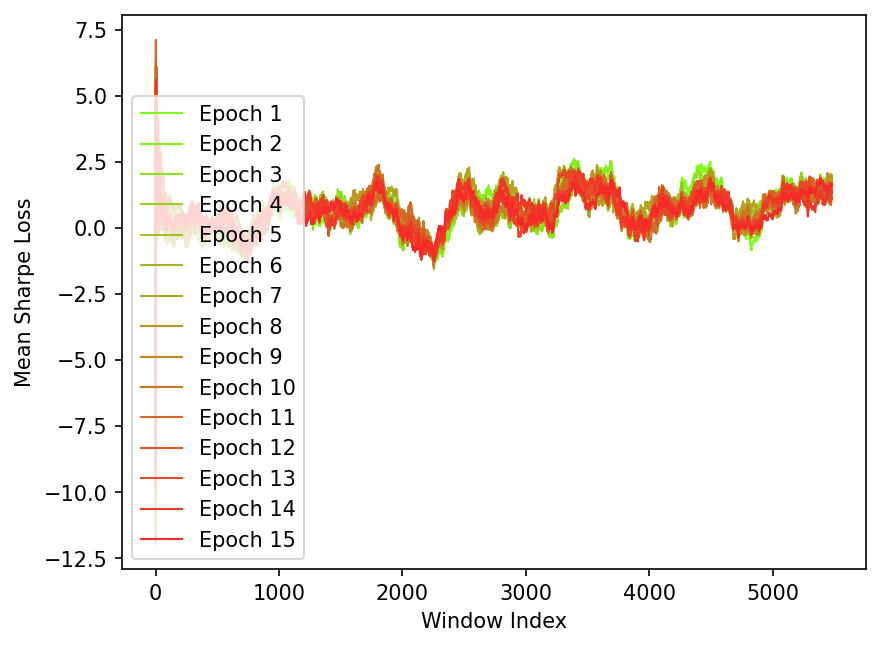

In [21]:
import numpy as np
from tqdm import tqdm
from pandas import DataFrame
from loss_functions.SharpeLoss import SharpeLoss
from models.TGNNPO import TGNNPO

color_1 = '#7EFF19'
color_2 = '#F72A2A'

plt.xlabel('Window Index')
plt.ylabel('Mean Sharpe Loss')

colors = get_color_gradient(color_1, color_2, epochs)

# (1) model
model = TGNNPO(node_features=loader.num_features, periods=window_length).to(device)
model.reset_parameters()

# (2) loss function
lossfn = SharpeLoss()

# (3) training procedure
model.train()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0, maximize=True)

for epoch in range(epochs):
    # optimizer resets itself between epochs
    cur_max_lr = learning_rate
    #optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=learning_rate/100.0, maximize=True)
    loss_history = []
    mean_history = []
    pbar = tqdm(enumerate(dataset), total=dataset.get_num_batches())
    if epoch == epochs - 1:
        results_data = {
            'date': [],
            'ticker': [],
            'returns': [],
            'weights': []
        }
    for steps, batch in pbar:
        X_batch = batch.x
        static_edge_index = batch.edge_index
        edge_weights = batch.edge_weight
        prices_batch = batch.y
        
        optimizer.zero_grad()
        
        # predict portfolio weights
        weights_pred = model(X_batch, static_edge_index, edge_weights)
  
        # sharpe ratio loss
        loss = lossfn(prices_batch[:, -2:], weights_pred, ascent=False)
        loss_history.append(loss[0].item())

        if epoch == epochs - 1:
            results_data['date'] = results_data['date'] + ([str(loader.dates[steps * step_length + window_length])[:10]] * loader.num_nodes)
            results_data['ticker'] = results_data['ticker'] + etf_tickers
            results_data['weights'] = results_data['weights'] + [weight.item() for weight in weights_pred.flatten()]
            portfolio_returns = torch.mul(weights_pred, torch.diff(torch.log(prices_batch[:, -2:]), dim=1))
            results_data['returns'] = results_data['returns'] + [return_val.item() for return_val in portfolio_returns.flatten()]

        if len(loss_history) < lookback_loss_mean:
            cur_mean_hist_val = sum(loss_history) / len(loss_history)
        else:
            cur_mean_hist_val = sum(loss_history[(-1 * lookback_loss_mean):]) / len(loss_history[(-1 * lookback_loss_mean):])
        cur_mean_hist_val = cur_mean_hist_val * np.sqrt(252)
        mean_history.append(cur_mean_hist_val)
        pbar.set_description("Epoch: %d, sharpe (mean loss): %1.5f" % (epoch + 1, mean_history[-1]))
        
        #if len(mean_history) > 1 and  mean_history[-2] - mean_history[-1] > 0.05:
        #    for g in optimizer.param_groups:
        #        g['lr'] = cur_max_lr

        loss[0].backward()
        #print(len(list(model.parameters())))
        #print(list(model.parameters())[1].grad)
        optimizer.step()
    plt.plot(list(range(dataset.get_num_batches())), mean_history, linewidth=1, label=f'Epoch {epoch+1}', color=colors[epoch])
    #learning_rate = learning_rate / 1.2

results_data = DataFrame(results_data)
plt.legend()

In [23]:
import os

# Put your notebook path here
cur_notebook_path = "/Users/dylansandfelder/Documents/Work/DanielCollab/graph-portfolio-opt/src/TGNNPODraft_CRSP.ipynb"

extra_info = 1
results_csv_path = os.path.join(os.path.dirname(cur_notebook_path), f"GNN_results_{extra_info}.csv")
results_data.to_csv(results_csv_path)